# AIP Assignment 3

@uthors: Darshil Patel(202011034), Vaidik Patel(202011038), Mayank Patel(202011045)

## Q1

In [1]:
#useful modules

import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import exposure
%matplotlib inline

In [2]:
#read image in BGR form and convert it to gray 
img1 = cv2.cvtColor(cv2.imread('building.jpg'), cv2.COLOR_BGR2GRAY)
print(type(img1))
print(img1.size)
print(img1.shape)
#print(img)

<class 'numpy.ndarray'>
213600
(400, 534)


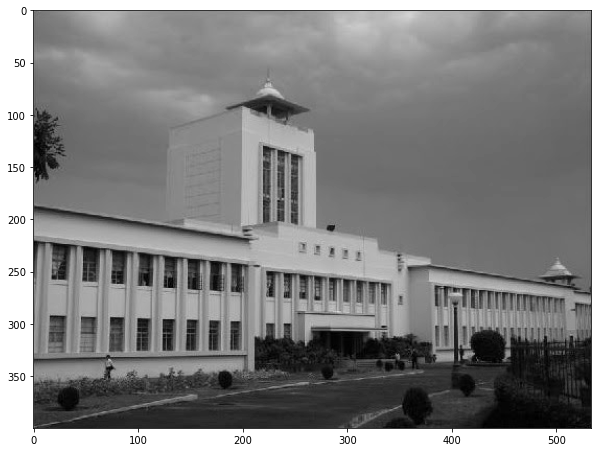

In [4]:
plt.imshow(img1,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

In [5]:
b = []
for i in range(8):
    b.append(np.bitwise_and(img1,1<<i))

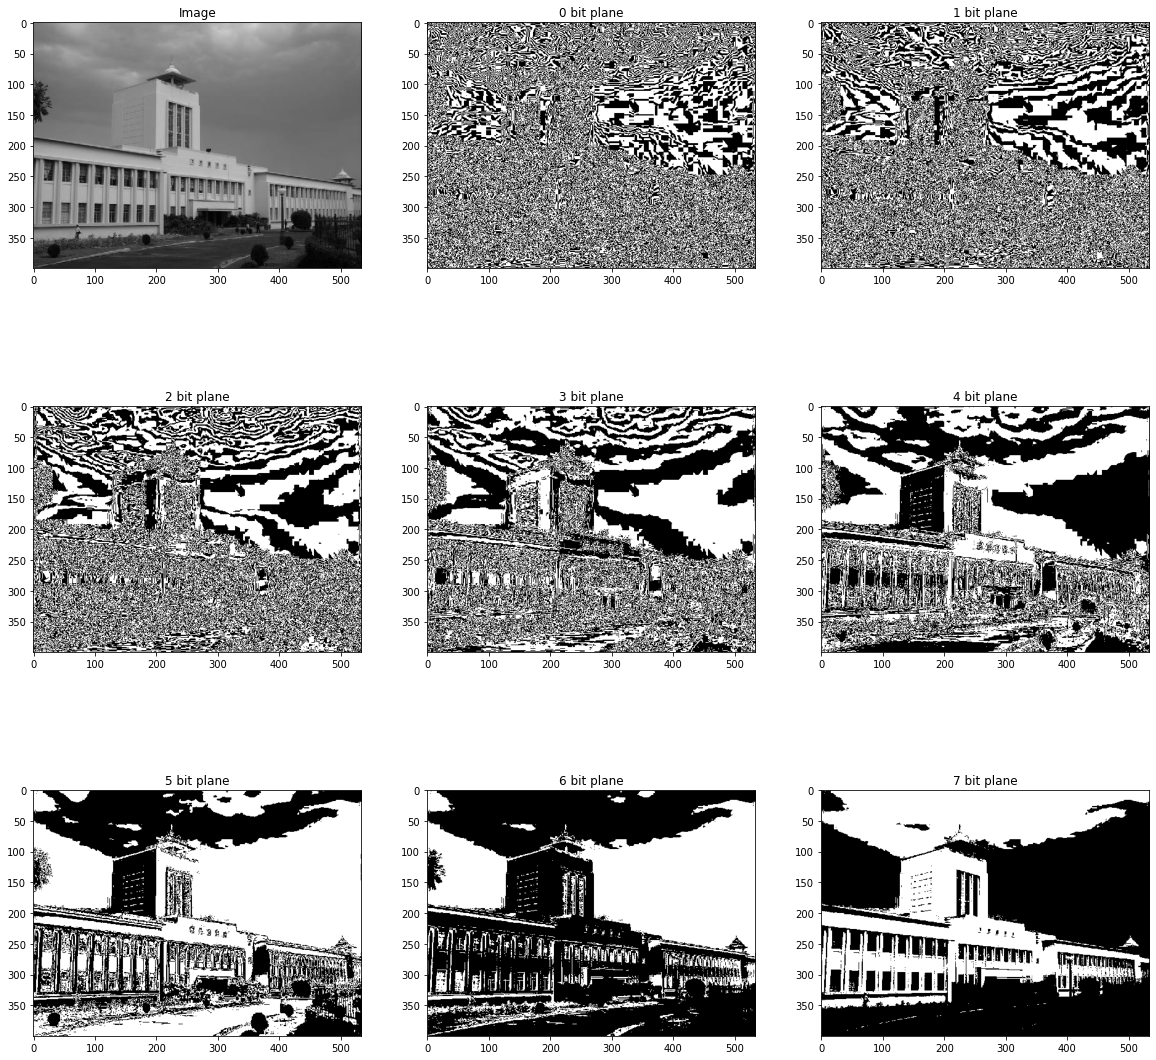

In [7]:
fig, ax = plt.subplots(3,3)
ax[0,0].imshow(img1,cmap='gray')
ax[0,0].set_title("Image")
for i in range(1,9):
    x = i//3
    y = i%3
    ax[x,y].imshow(b[i-1],cmap='gray')
    ax[x,y].set_title(str(i-1)+" bit plane")

plt.rcParams["figure.figsize"]=20,20
plt.show()

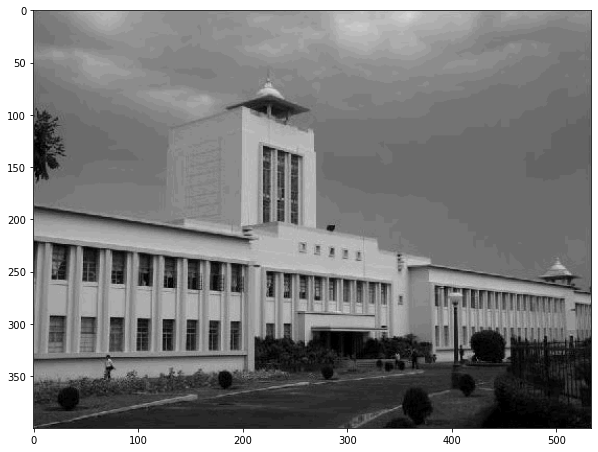

In [9]:
# reconstruct the image back by removing three least significant bit planes

r_img1 = b[3]+b[4]+b[5]+b[6]+b[7]
plt.imshow(r_img1,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

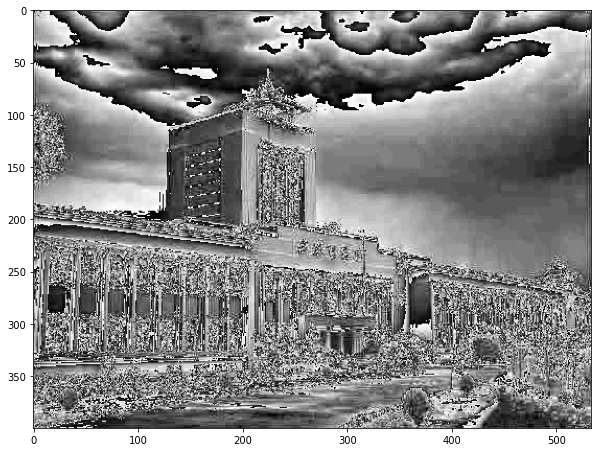

In [10]:
# reconstruct the image by removing three most significant bit planes

r_img1 = b[0]+b[1]+b[2]+b[3]+b[4]
plt.imshow(r_img1,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

## Q2

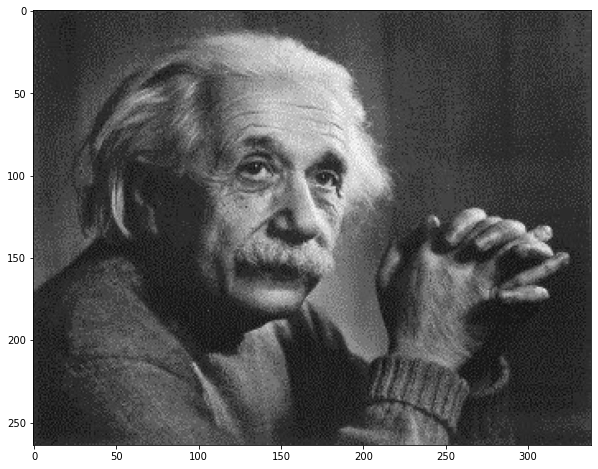

In [11]:
img2 = cv2.cvtColor(cv2.imread('einstein.jpg'),cv2.COLOR_BGR2GRAY)
plt.imshow(img2,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

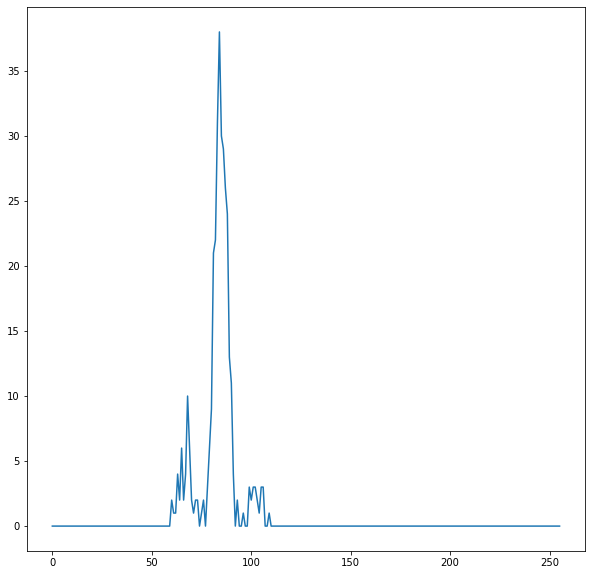

In [12]:
histo_img2 = cv2.calcHist(img2,[0],None,[256],[0,256]) 
plt.plot(histo_img2)
plt.show()

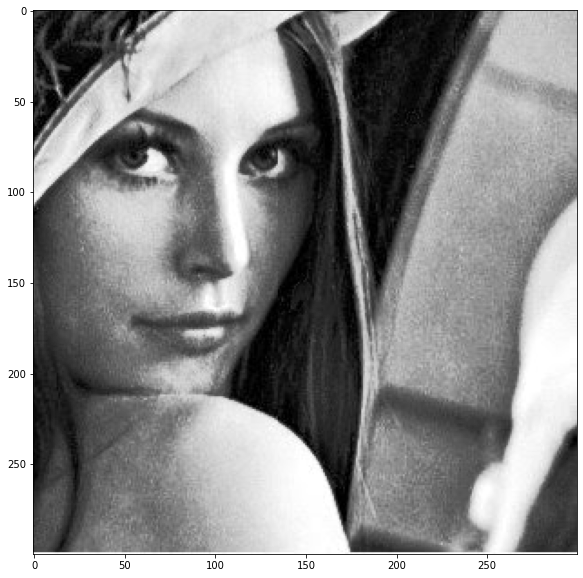

In [13]:
img2_lena= cv2.cvtColor(cv2.imread('Lena.jpg'),cv2.COLOR_BGR2GRAY)
plt.imshow(img2_lena,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

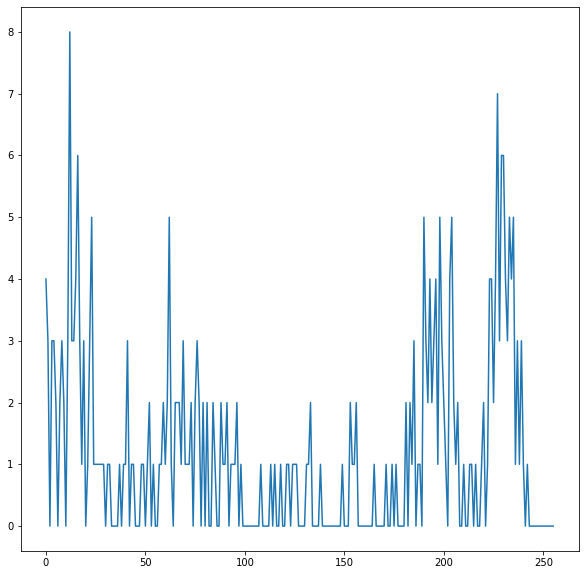

In [14]:
histo_img2_lena = cv2.calcHist(img2_lena,[0],None,[256],[0,256]) 
plt.plot(histo_img2_lena)
plt.show()

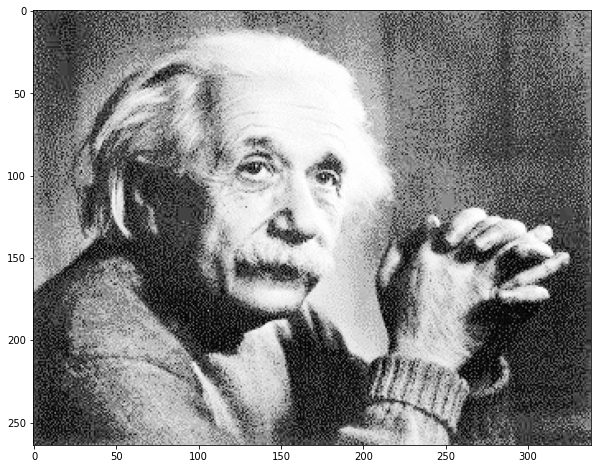

In [15]:
ans_img2 = np.array(exposure.match_histograms(img2, img2_lena),dtype='uint8')
plt.imshow(ans_img2,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

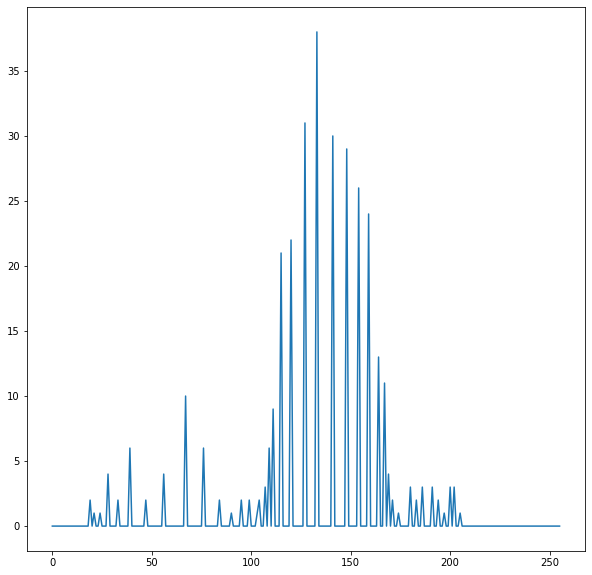

In [16]:
histo_ans = cv2.calcHist(ans_img2,[0],None,[256],[0,256]) 
plt.plot(histo_ans)
plt.show()

In [17]:
x_arr = np.arange(256)
y_arr = np.zeros(256,dtype='uint8')

In [18]:
for i in range(ans_img2.shape[0]):
    for j in range(ans_img2.shape[1]):
        y_arr[img2[i,j]] = ans_img2[i,j]

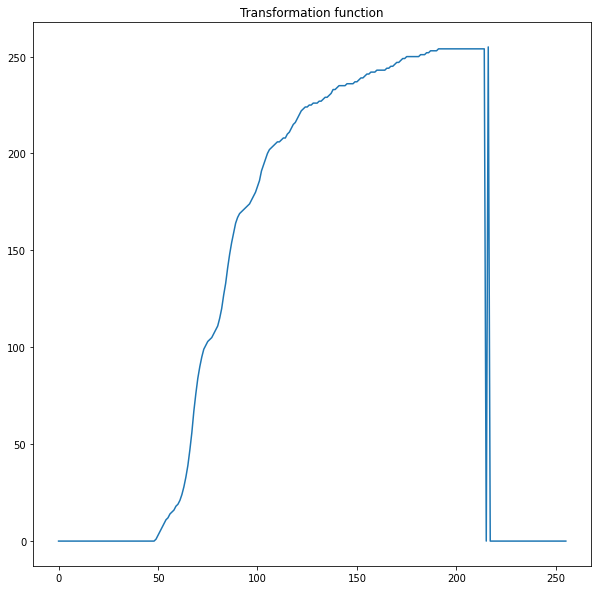

In [19]:
plt.plot(x_arr,y_arr)
plt.title('Transformation function')
plt.show()

## Q3

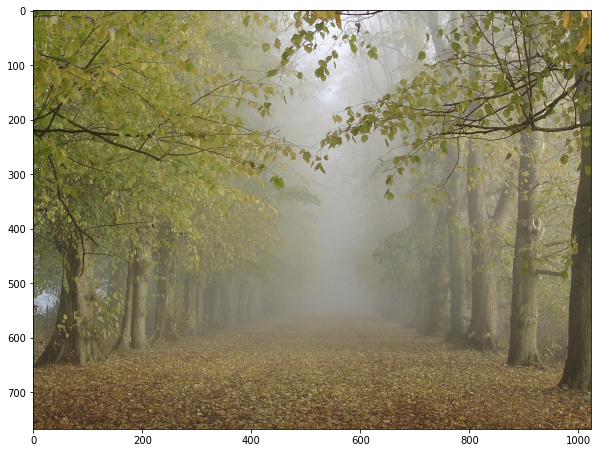

In [20]:
img31 = cv2.cvtColor(cv2.imread("forest.jpg"),cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(img31,cv2.COLOR_HSV2RGB))
plt.rcParams["figure.figsize"]=10,10
plt.show()

In [21]:
ans = img31.copy()
ans[:,:,1] = 1.65*img31[:,:,1]

ans[:,:,1] = ans[:,:,1] - np.min(ans[:,:,1])
ans[:,:,1] = np.array(255*(ans[:,:,1]/np.max(ans[:,:,1])),dtype='int8')

ans[:,:,2] = cv2.equalizeHist(img31[:,:,2])

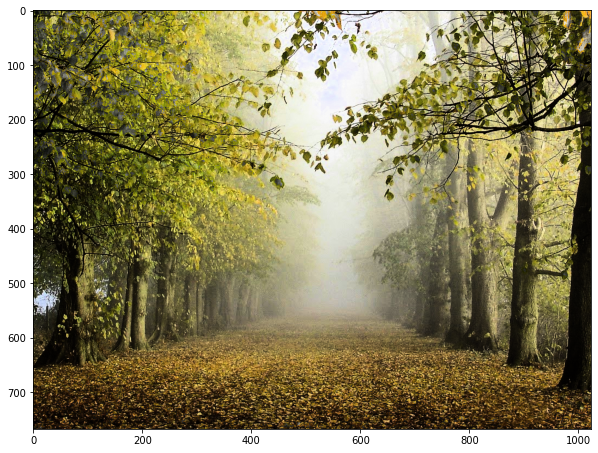

In [22]:
ans_rgb = cv2.cvtColor(ans,cv2.COLOR_HSV2RGB)

plt.imshow(ans_rgb)
plt.rcParams["figure.figsize"]=10,10
plt.show()

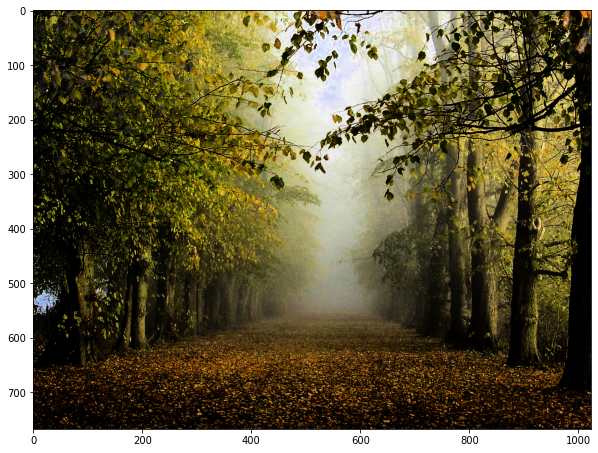

In [23]:
gamma_img31 = np.array(255*((ans_rgb/255))**2,dtype='uint8')

plt.imshow(gamma_img31)
plt.rcParams["figure.figsize"]=10,10
plt.show()

In [24]:
A = [0.8159, 0.8186, 0.8272]
I = cv2.cvtColor(img31,cv2.COLOR_HSV2RGB)
J = gamma_img31
r,c,v  = img31.shape

A_r = np.full((r,c), A[0])
A_g = np.full((r,c), A[1])
A_b = np.full((r,c), A[2])

A = cv2.merge((A_r, A_g, A_b))

T = np.divide((I-A),(J-A))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


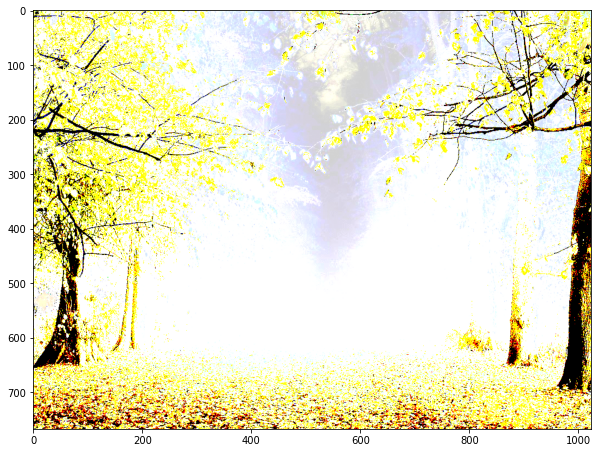

In [25]:
plt.imshow(T)
plt.rcParams["figure.figsize"]=10,10
plt.show()

In [26]:
trans = cv2.imread("trans.jpg")
dist = np.sqrt(np.sum(T**2 - trans**2))
print("Distance : ",dist)

Distance :  128540.43450887177
